## R labsession 3
Buriola Lorenzo - 2021860

In [1]:
#Function for figure dimensions
fig <- function(width, heigth){
    options(repr.plot.width = width, repr.plot.height = heigth)
}

## Exercise 1

In [2]:
dtriang <- function(x, a, b, c){
    if (x>=a & x<c){2*(x-a)/((b-a)*(c-a))}
    else if (x>=c & x<=b){2*(b-x)/((b-a)*(b-c))}
    else 0
}

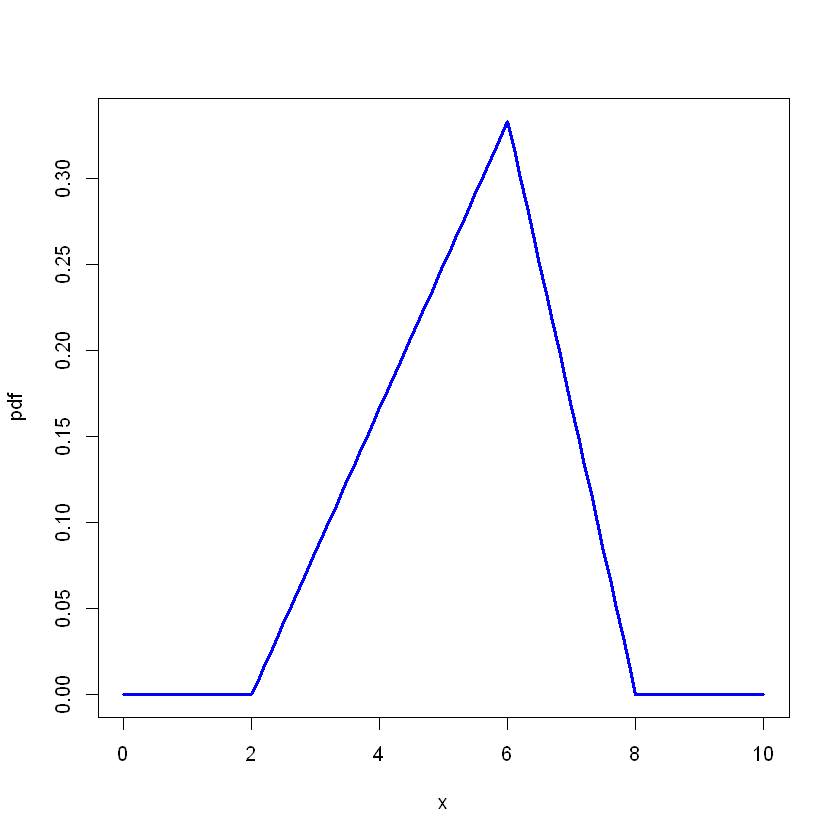

In [3]:
x <- seq(0, 10, 0.1)
A = 2
B = 8
C = 6
y <- sapply(x, dtriang, a=A, b=B, c=C)
plot(x, y, type = 'l', col = 'blue', lwd = 3, ylab = 'pdf')

Random samples will be generate using the inverse cdf method

In [4]:
invcdf <- function(p, a, b, c){
    th <- (c-a)/(b-a)
    if (p<=th) {a+sqrt(p*(b-a)*(c-a))}
    else {b-sqrt((1-p)*(b-a)*(b-c))}
}

rtriang <- function(n, a, b, c){
    u <- runif(n)
    sapply(u, invcdf, a, b, c)
}

Note that, in order to superimpose the pdf over the histogram of random samples, the probability distribution is multiplied by the number of data $N$ and the width of the bin.

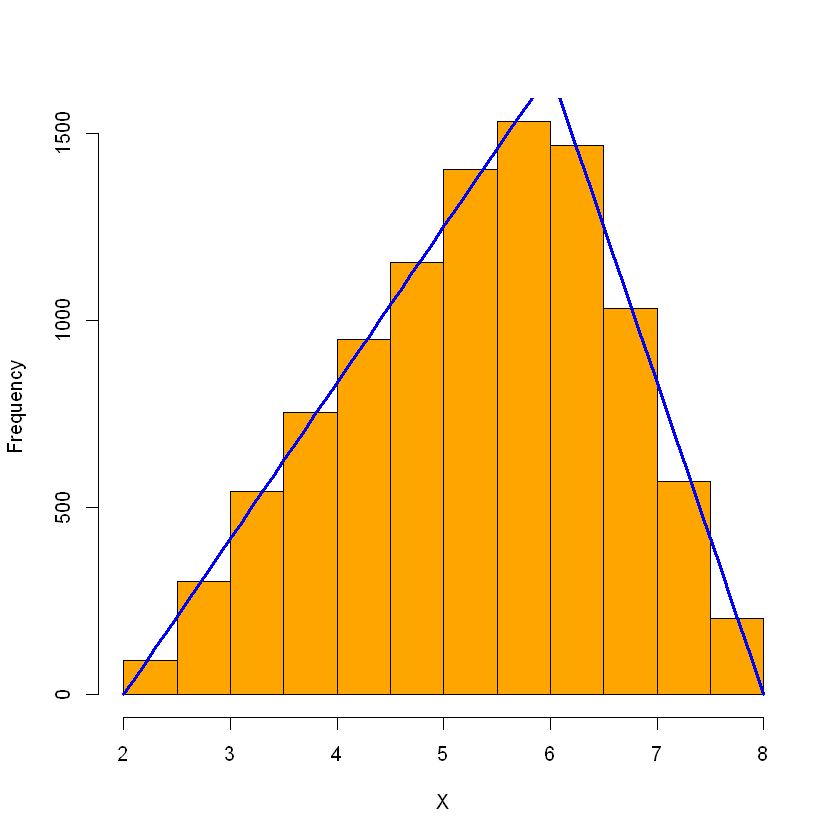

In [5]:
N = 10000
X <- rtriang(N, a=A, b=B, c=C)
step <- 0.5
edges <- seq(2, 8, step)
hist(X, breaks = edges, col = 'orange', main = '')
x <- seq(2, 8, 0.1)
y <- N*step*sapply(x, dtriang, a=A, b=B, c=C)
lines(x, y, type = 'l', col = 'blue', lwd = 3)

## Exercise 2

In [6]:
library(tidyverse)
library(gridExtra)
library(ggthemes)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In order to repeat the same operation multiple times with different functions, _invoke_map_ is used. We also define a custom function for plotting, it will be passed a _map_ functional.

Note that the __WARNINGS__ generated are due to the fact that limits in the canvas where imposed.

Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 19 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."
Warning message:
"Removed 2 row(s) containing missing values (geom_path)."


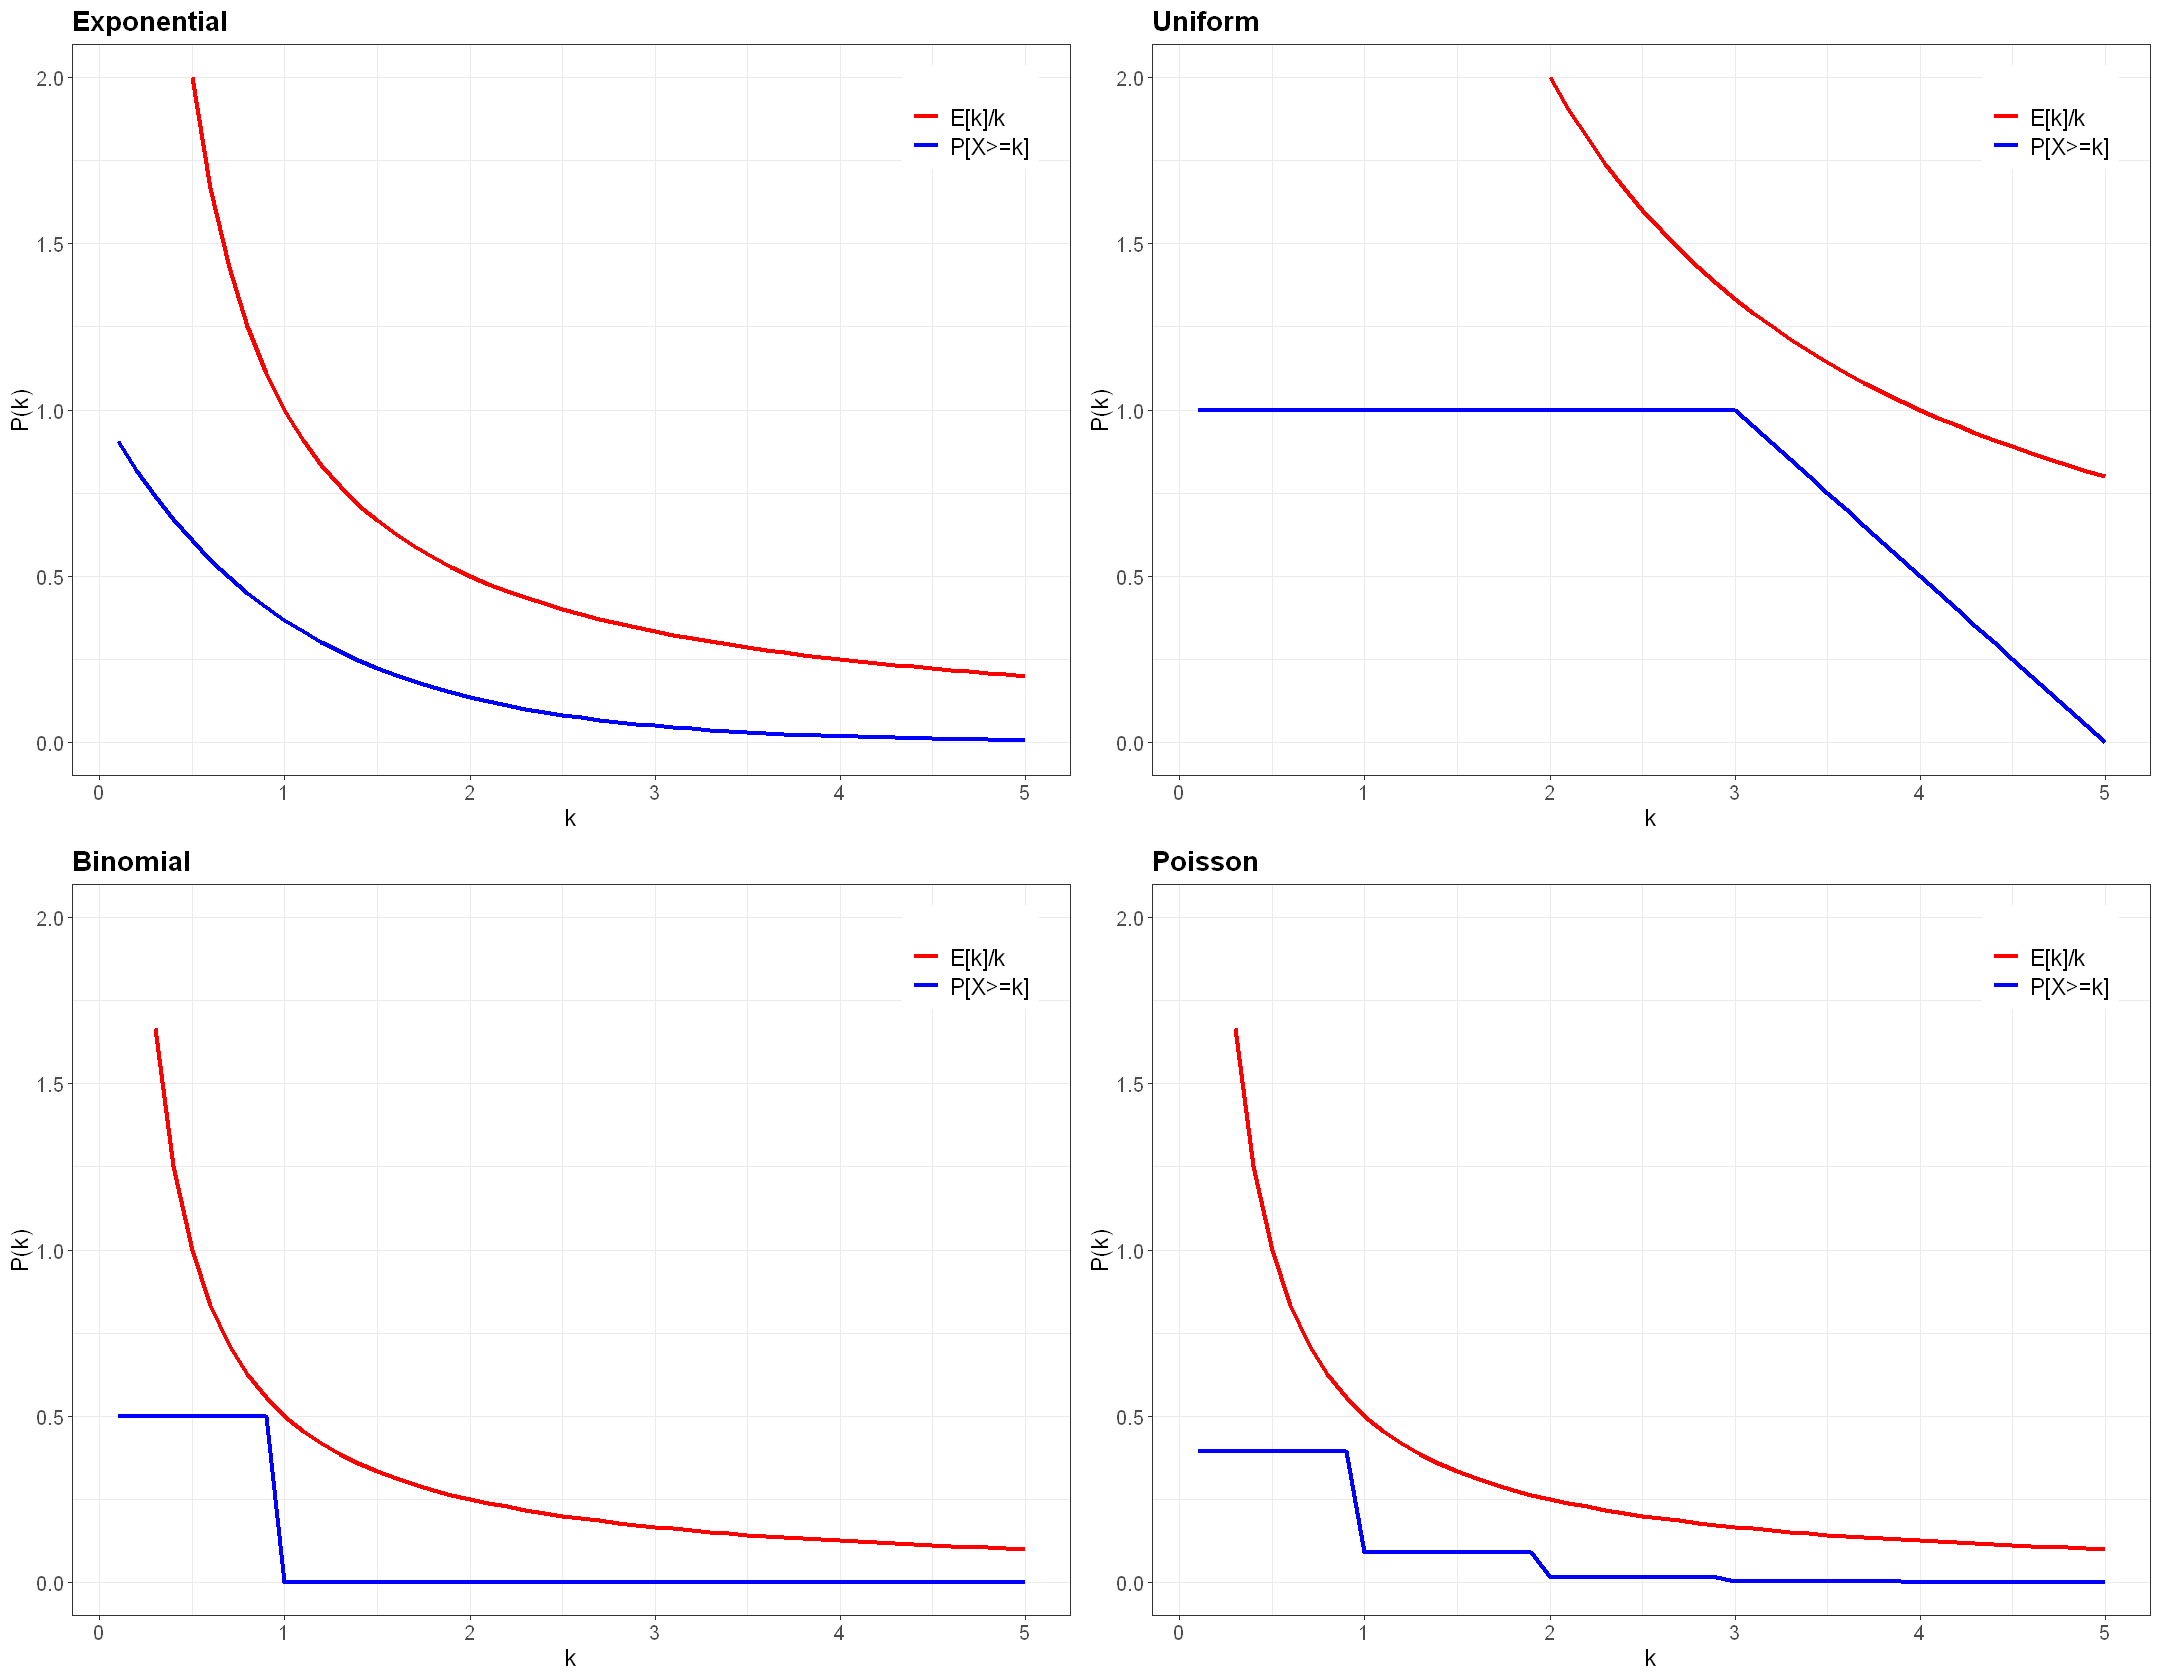

In [7]:
funcs <- c('pexp', 'punif', 'pbinom', 'ppois')
param <- list(list(rate = 1),
             list(min = 3, max = 5),
             list(size = 1, prob = 0.5),
             list(lambda = 0.5))
means <- c(1, 4, 0.5, 0.5)
k <- seq(0.1, 5, 0.1)
F <- invoke_map(funcs, param, k)
fig(18, 14)
par(mfrow = c(2,2))
titles <- c('Exponential', 'Uniform', 'Binomial', 'Poisson')
plotfunc <- function(i){
    ggplot() + geom_line(aes(k, 1-F[[i]], color = "P[X>=k]"), size = 1.2) + geom_line(aes(k, means[i]/k, color = "E[k]/k"), size = 1.2) +
    xlab('k') + ylab('P(k)') + ylim(0, 2) + ggtitle(titles[i]) +  scale_color_manual(name = '', values = c('P[X>=k]' = 'blue', 'E[k]/k' = 'red')) +
    theme_bw() +
    theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
    theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
    theme(plot.title = element_text(size = 16, face = "bold")) +
    theme(legend.text = element_text(size = 14), legend.position = c(0.9,0.9))
}

p <- 1:4 %>% map(plotfunc)
do.call(grid.arrange, p)

The Markov's inequality is visually shown

## Exercise 3

The _bound_ function is defined. Them the pdf used and the parameters are stored in a tibble for convenience.

In [8]:
bound <- function(k){
    1-1/k^2
}

funcs <- c('pnorm', 'pexp', 'punif', 'ppois')
k <- seq(0.5, 10, 0.1) 
means <- c(3, 1, 1, 1/3)
sds <- c(5, 1, sqrt(2/3), sqrt(1/3))
pd <- means + outer(sds, k)
ps <- means - outer(sds, k)
params <- list(list(mean = 3, sd = 5),
             list(rate = 1),
             list(min = 1-sqrt(2), max = 1+sqrt(2)),
             list(lambda = 1/3))

df <- tibble(funcs, params, means, sds)
df

funcs,params,means,sds
<chr>,<list>,<dbl>,<dbl>
pnorm,"3, 5",3.0000000,5.0000000
pexp,1,1.0000000,1.0000000
punif,"-0.4142136, 2.4142136",1.0000000,0.8164966
ppois,0.3333333,0.3333333,0.5773503


Also in this case some custom functions are generated in order to use the _map_ functional. One to execute the calculation needed and one for plotting.

Warning message:
"Removed 5 row(s) containing missing values (geom_path)."
Warning message:
"Removed 5 row(s) containing missing values (geom_path)."
Warning message:
"Removed 5 row(s) containing missing values (geom_path)."
Warning message:
"Removed 5 row(s) containing missing values (geom_path)."


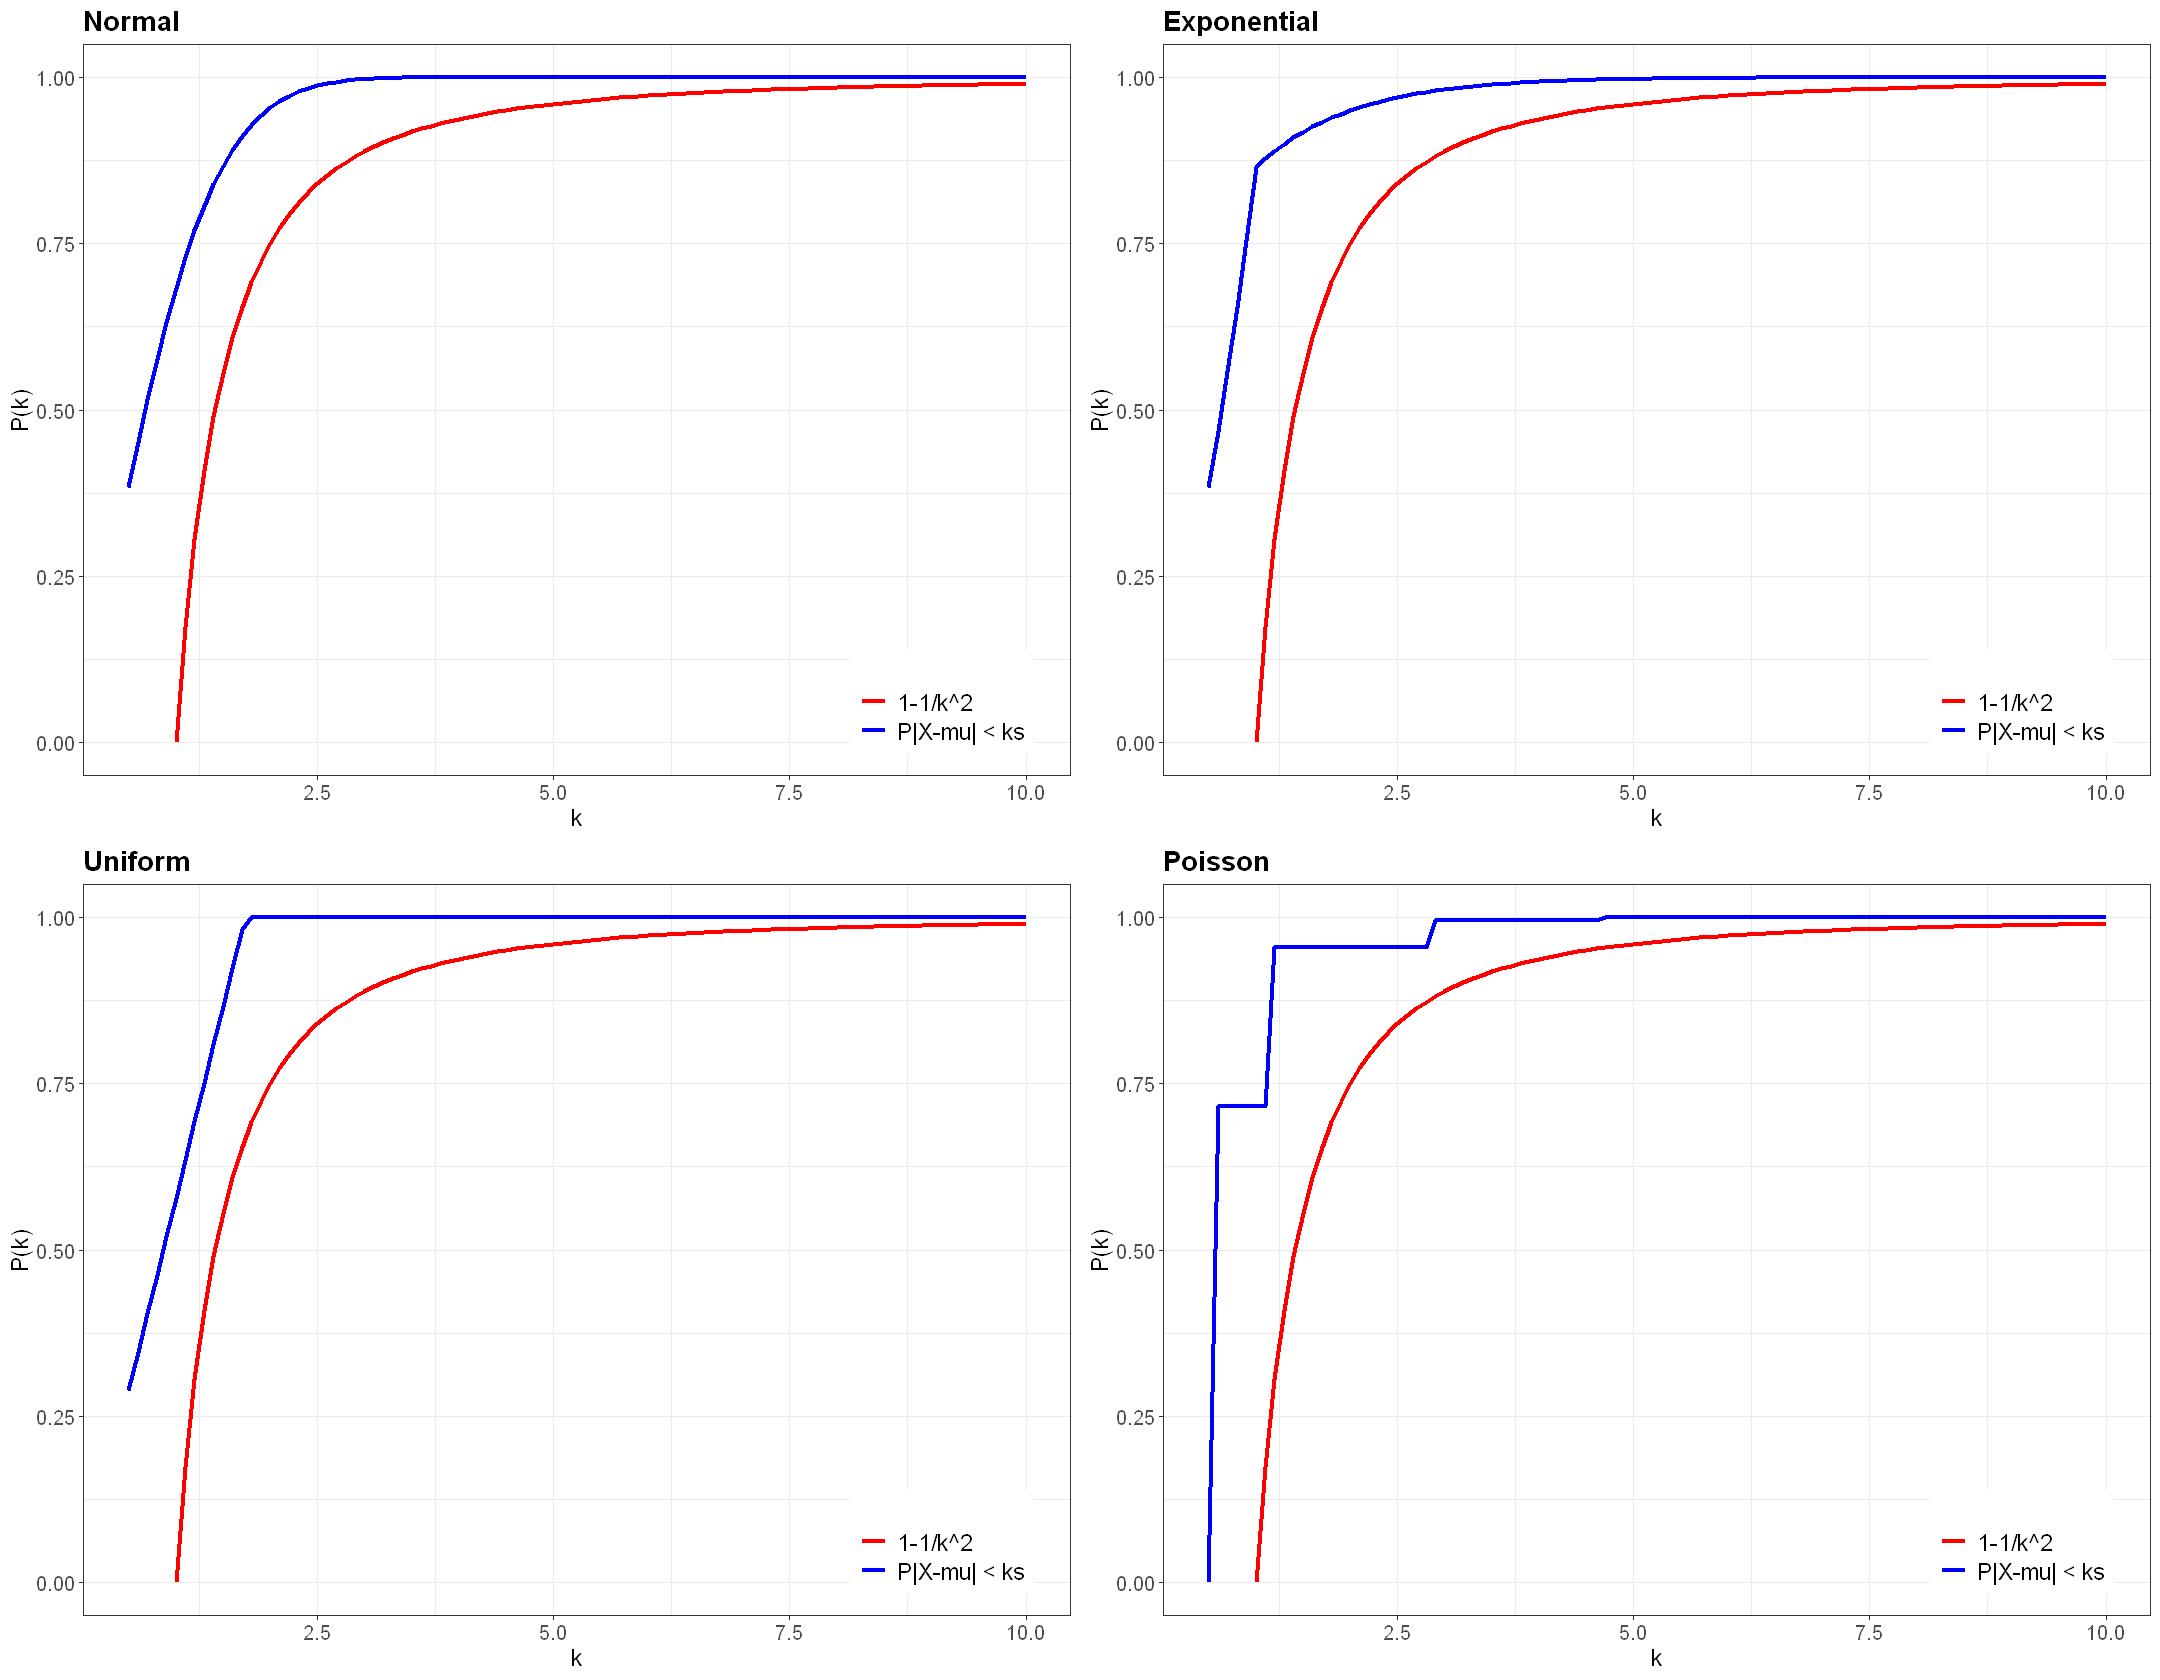

In [9]:
fig(18, 14)
par(mfrow = c(2,2))
myfunc <- function(i){
    pd <- exec(df$funcs[i], df$means[i]+k*df$sds[i], !!!df$params[[i]])
    ps <- exec(df$funcs[i], df$means[i]-k*df$sds[i], !!!df$params[[i]])
    pd-ps
}

P <- 1:4 %>% map(myfunc)
titles <- c('Normal', 'Exponential', 'Uniform', 'Poisson')

plotfunc <- function(i){
    ggplot() + geom_line(aes(k, P[[i]], color = "P|X-mu| < ks"), size = 1.2) + geom_line(aes(k, bound(k), color = "1-1/k^2"), size = 1.2) +
    xlab('k') + ylab('P(k)') + ggtitle(titles[i]) + ylim(0, 1) + scale_color_manual(name = '', values = c('P|X-mu| < ks' = 'blue', '1-1/k^2' = 'red')) +
    theme_bw() +
    theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
    theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
    theme(plot.title = element_text(size = 16, face = "bold")) +
    theme(legend.text = element_text(size = 14), legend.position = c(0.87,0.1))
}

p <- 1:4 %>% map(plotfunc)
do.call(grid.arrange, p)

Chebyshev's inequality is visually shown

## Exercise 4

In [10]:
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




After they are imported, we select data concerning two countries: Italy and Finland. Actually these two countries were affected differently by the virus and also the relative governments acted differently. Only interesting features are kept and the week and the month are computed using the _date_ information.

In [11]:
global.data <- tibble(read.csv('DATA/Global_Mobility_Report.csv'))

In [12]:
itafin.data <- global.data %>% filter(country_region %in% c('Italy', 'Finland')) %>% 
            select(country_region, date, retail_and_recreation_percent_change_from_baseline, grocery_and_pharmacy_percent_change_from_baseline, parks_percent_change_from_baseline, 
                  transit_stations_percent_change_from_baseline, workplaces_percent_change_from_baseline, residential_percent_change_from_baseline) %>% 
            mutate(Week = week(date), Month = month(date))

Two new datasets are created for plotting

In [13]:
weekly.data <- itafin.data %>% group_by(country_region, Week) %>% select(-date, -Month) %>% summarise_all(mean, na.rm = TRUE) %>% mutate(date = ymd("2020-01-01") + weeks(Week - 1))

In [14]:
monthly.data <- itafin.data %>% group_by(country_region, Month) %>% select(-date, -Week) %>% summarise_all(mean, na.rm = TRUE) %>% mutate(date = ymd("2020-01-01") + months(Month - 1))

In the next two cells the plot of the six categories are shown by week and by month. Note that for the visualisation the week/month data are transformed into dates

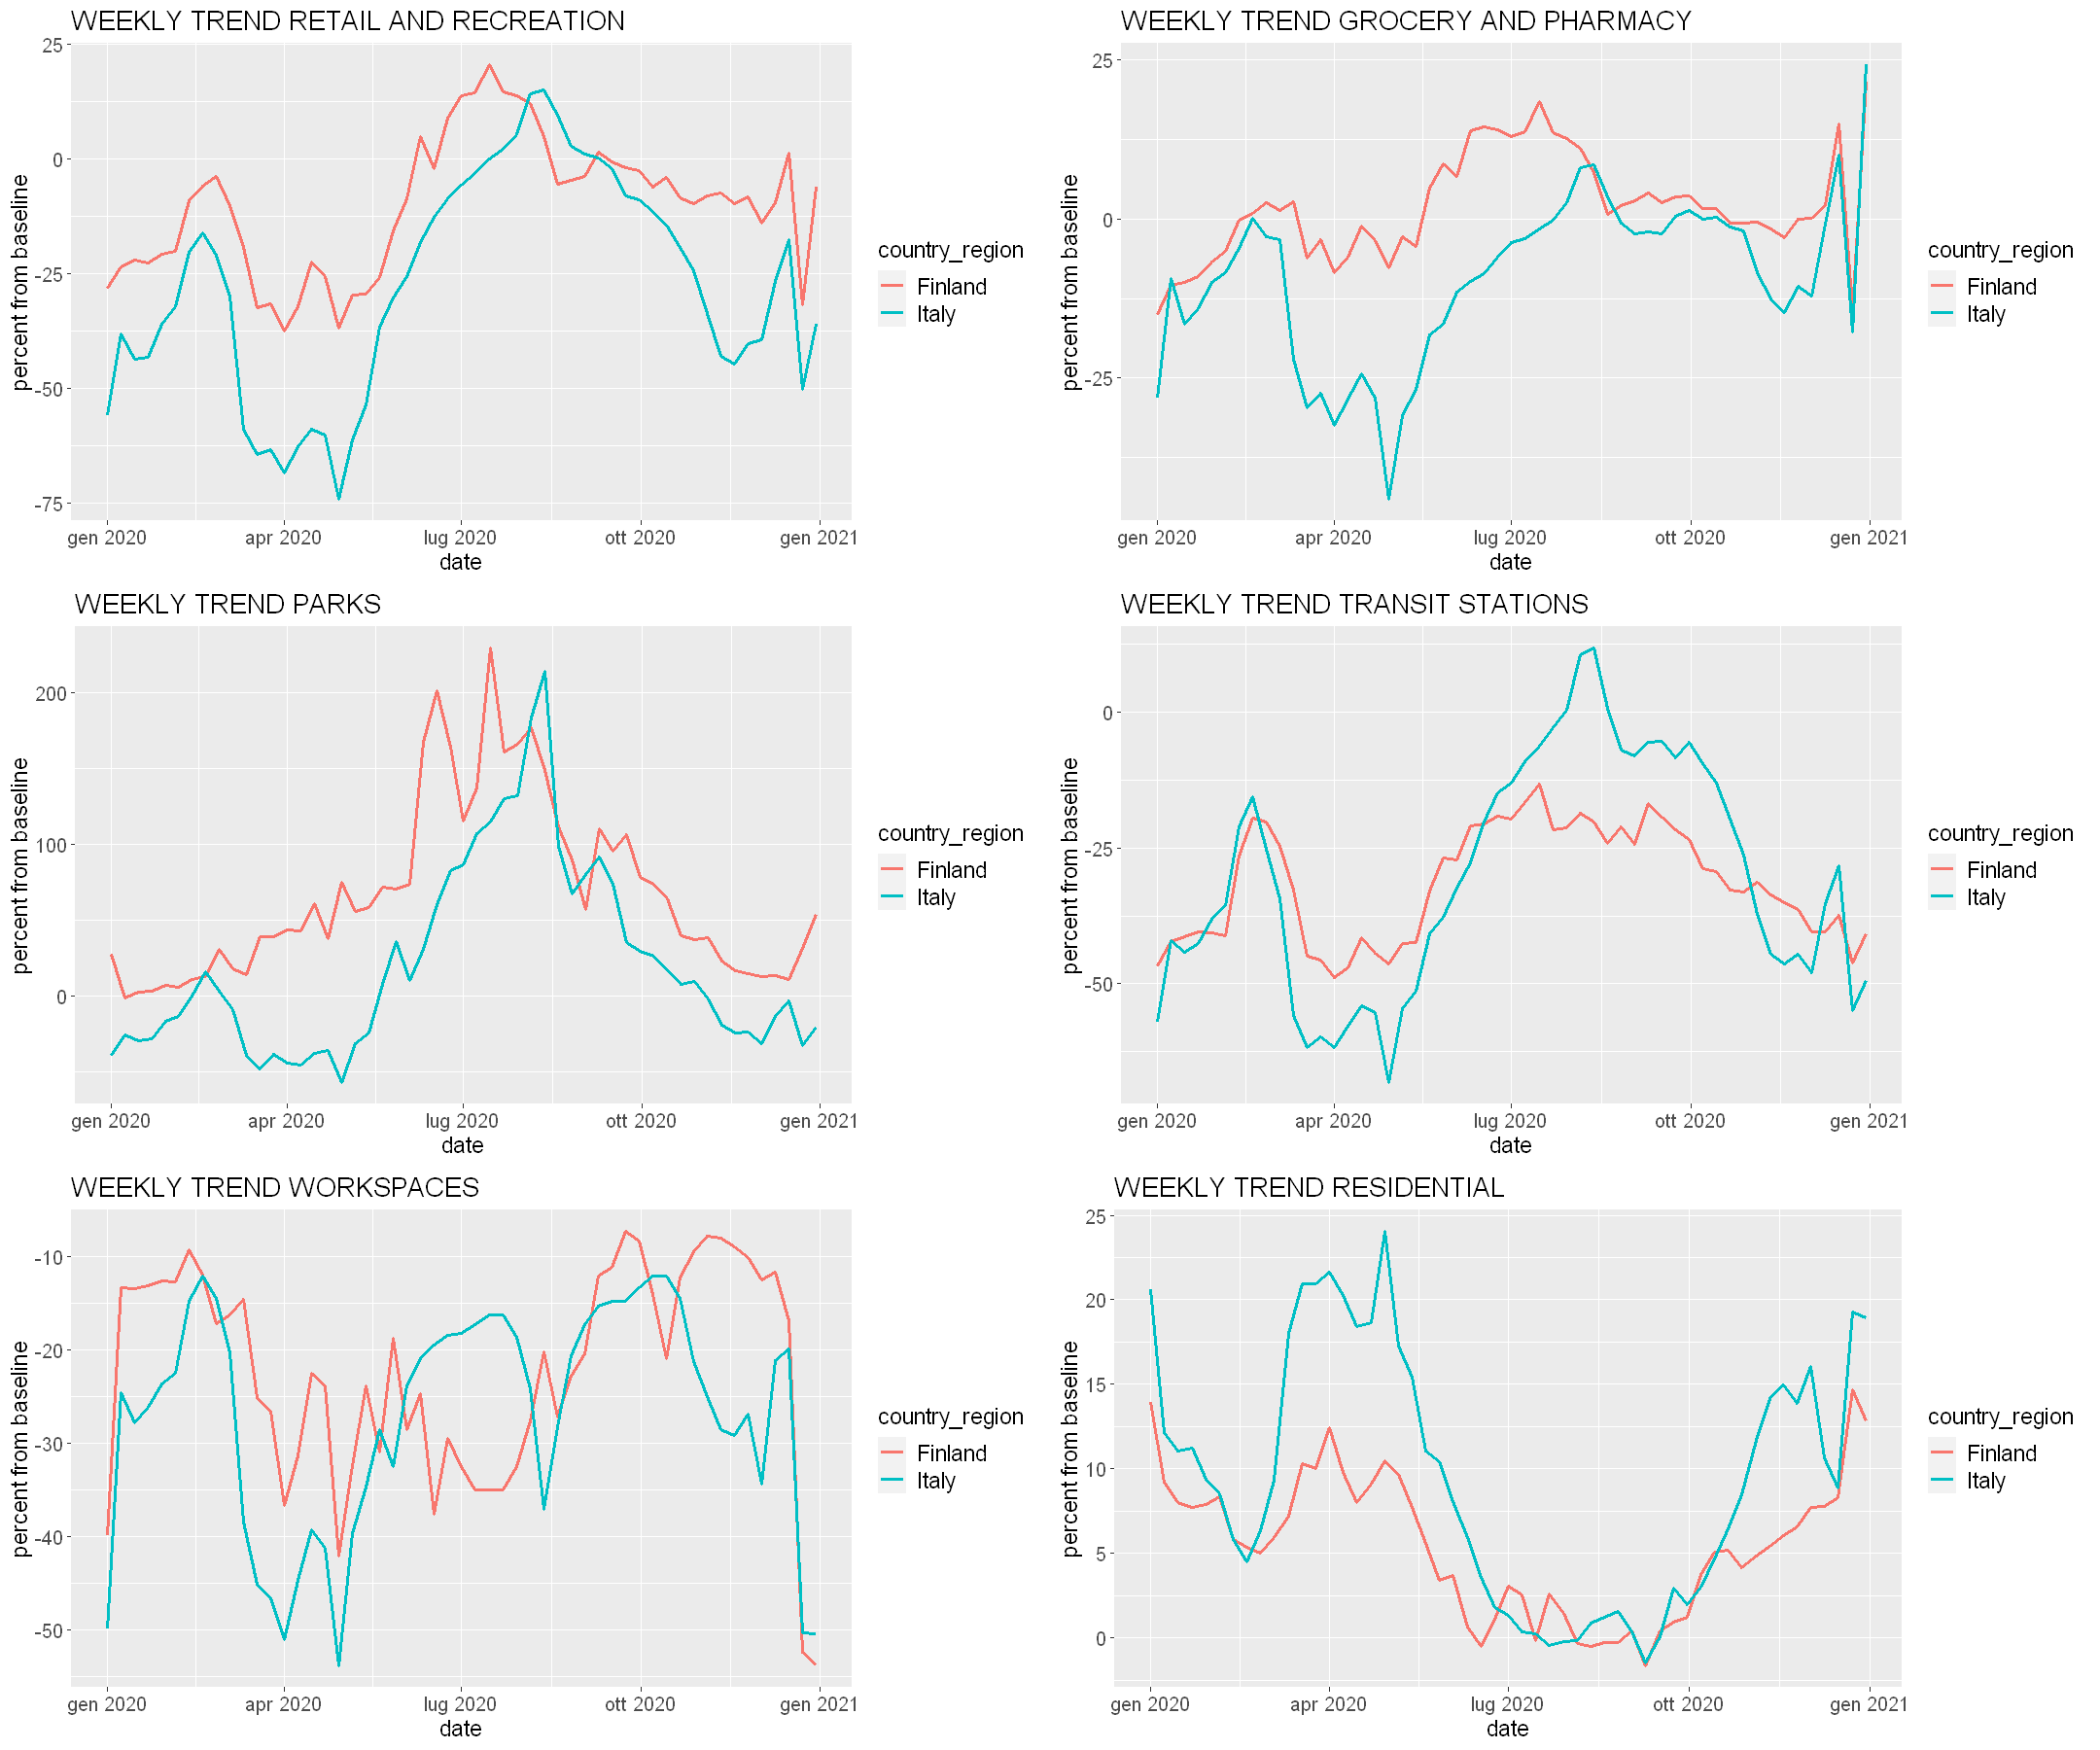

In [15]:
titles <- c('WEEKLY TREND RETAIL AND RECREATION', 'WEEKLY TREND GROCERY AND PHARMACY', 'WEEKLY TREND PARKS', 'WEEKLY TREND TRANSIT STATIONS', 'WEEKLY TREND WORKSPACES', 'WEEKLY TREND RESIDENTIAL')
ys <- list(weekly.data$retail_and_recreation_percent_change_from_baseline, weekly.data$grocery_and_pharmacy_percent_change_from_baseline, 
        weekly.data$parks_percent_change_from_baseline, weekly.data$transit_stations_percent_change_from_baseline,
        weekly.data$workplaces_percent_change_from_baseline, weekly.data$residential_percent_change_from_baseline)

plotfunc <- function(i){
    p1 <- weekly.data %>% ggplot(aes(date, ys[[i]], grop = country_region))
    p1 + geom_line(aes(col = country_region), size = 1) +
    xlab('date') + ylab('percent from baseline') + ggtitle(titles[i]) +
    theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
    theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
    theme(plot.title = element_text(size = 16)) +
    theme(legend.title = element_text(size = 14), legend.text = element_text(size = 14))
}

fig(18, 15)
p <- 1:6 %>% map(plotfunc)
do.call(grid.arrange, p)

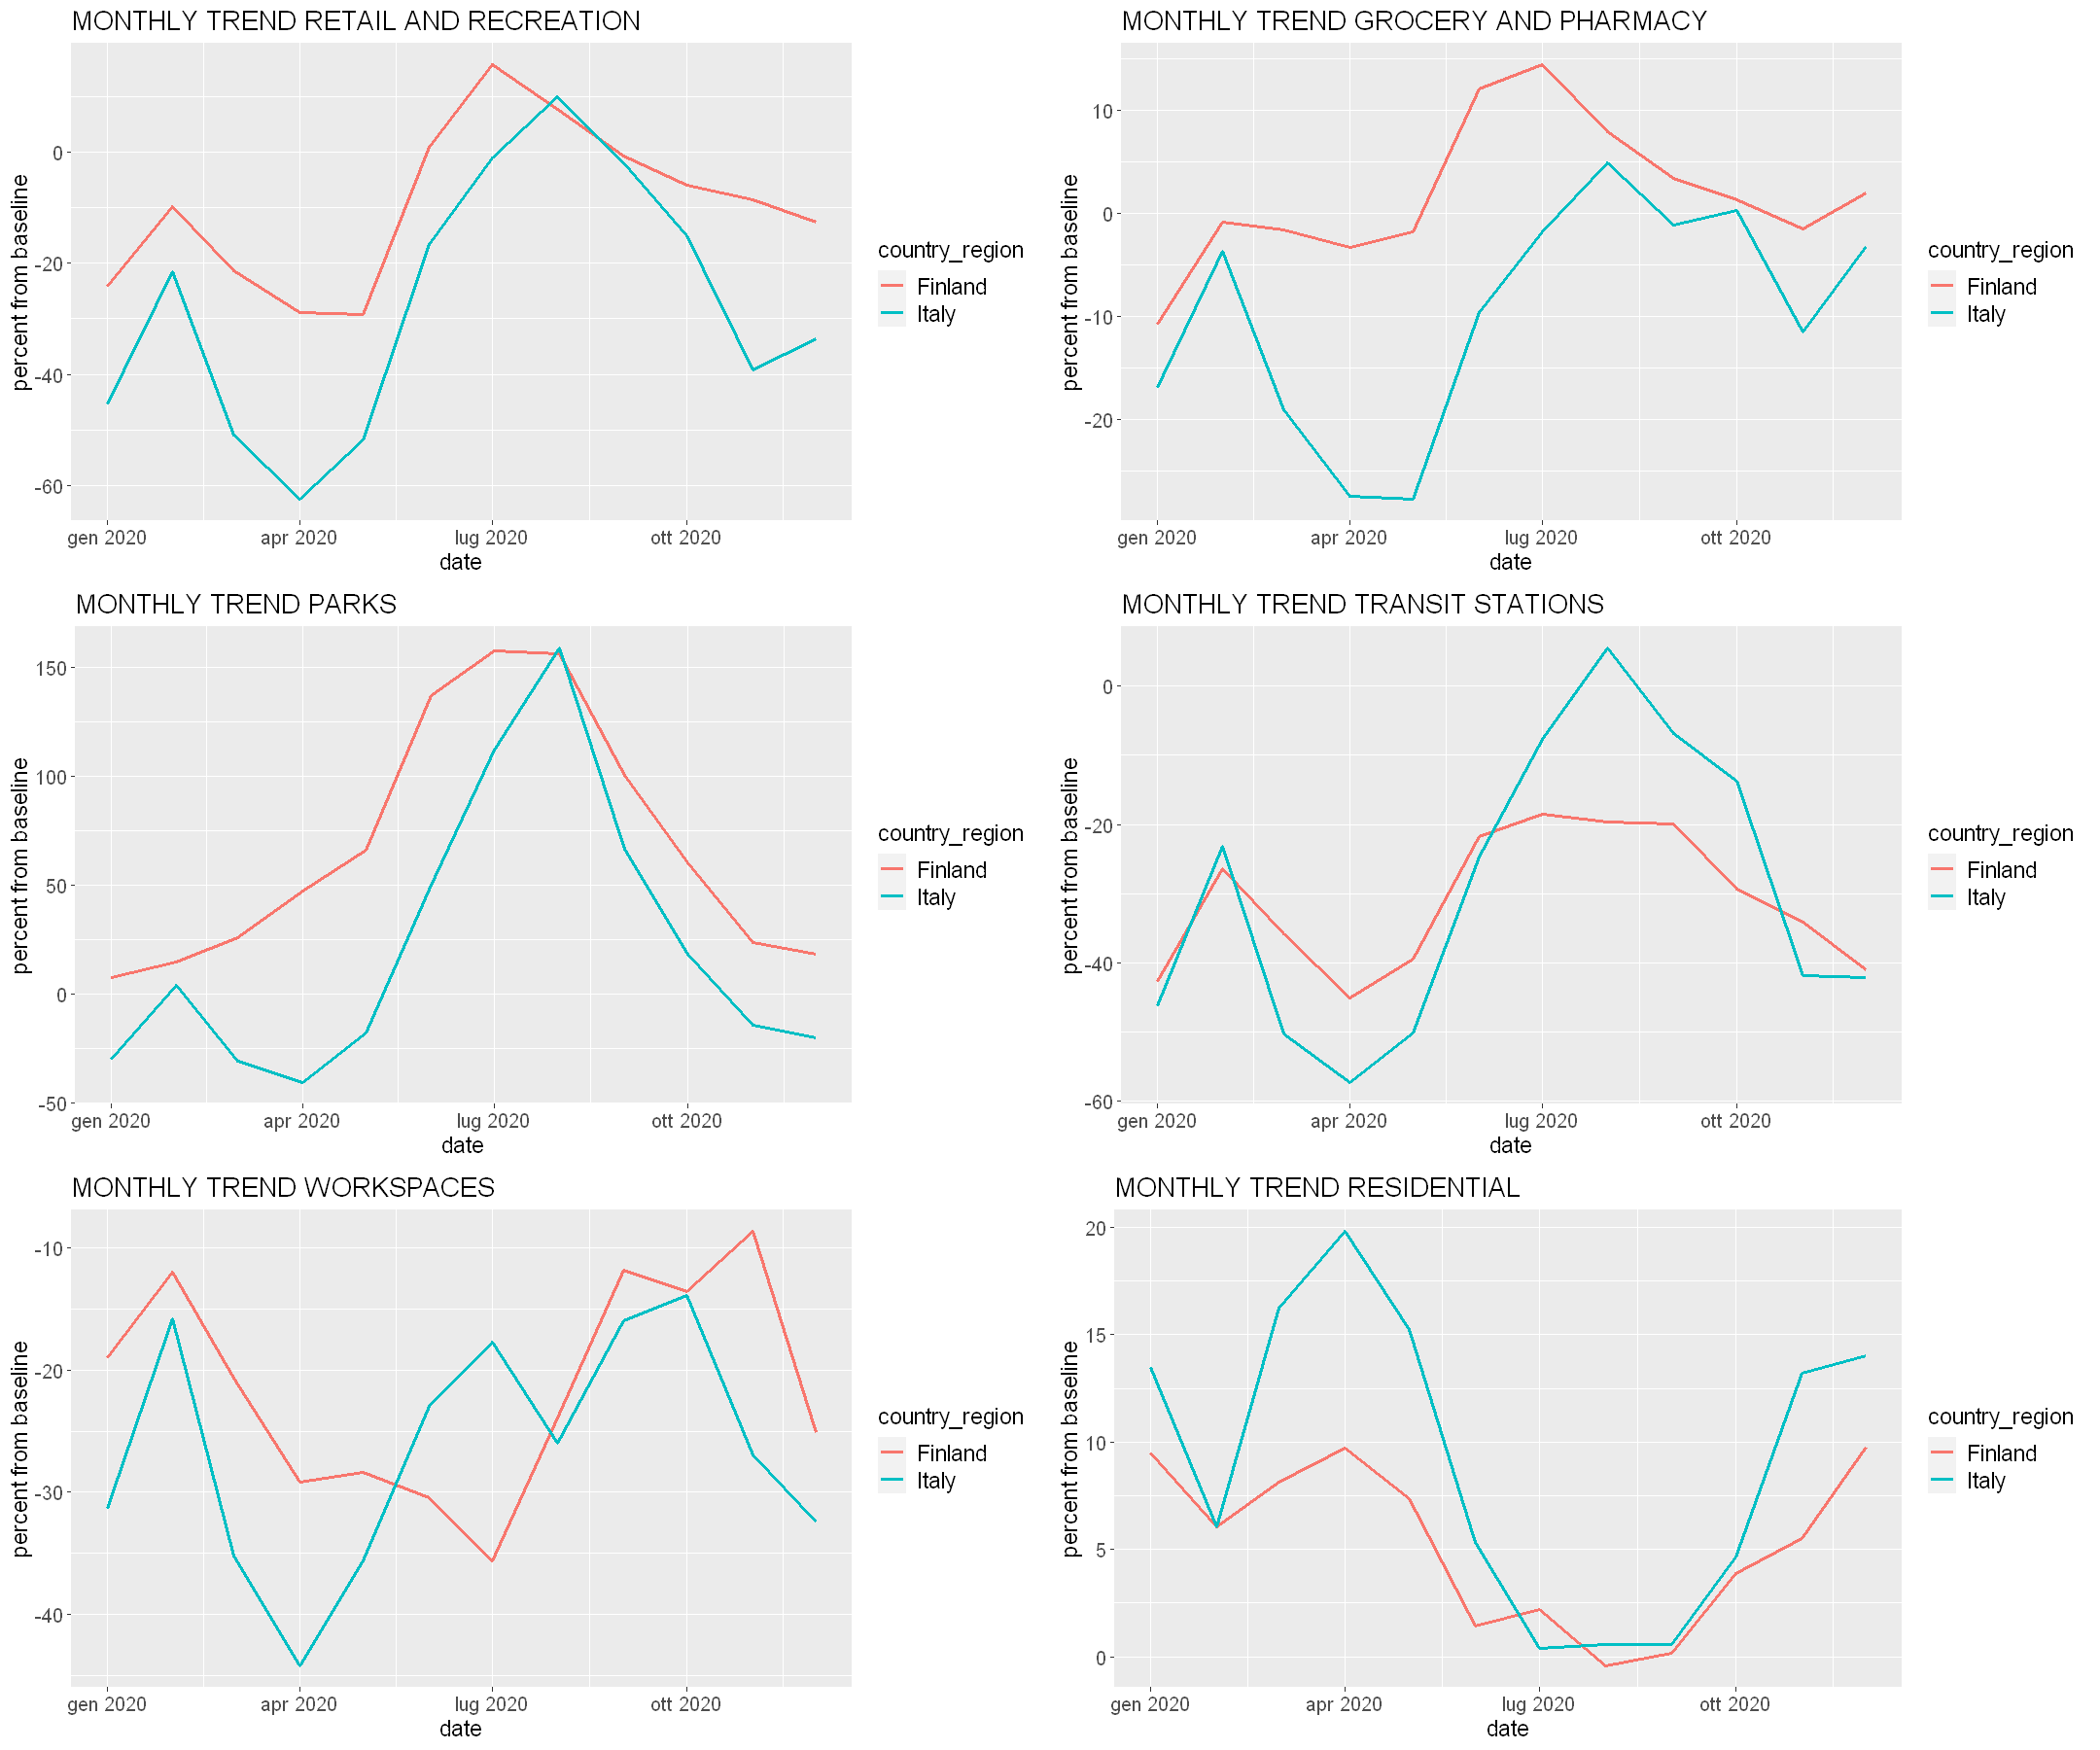

In [16]:
titles <- c('MONTHLY TREND RETAIL AND RECREATION', 'MONTHLY TREND GROCERY AND PHARMACY', 'MONTHLY TREND PARKS', 'MONTHLY TREND TRANSIT STATIONS',
            'MONTHLY TREND WORKSPACES', 'MONTHLY TREND RESIDENTIAL')
ys <- list(monthly.data$retail_and_recreation_percent_change_from_baseline, monthly.data$grocery_and_pharmacy_percent_change_from_baseline, 
        monthly.data$parks_percent_change_from_baseline, monthly.data$transit_stations_percent_change_from_baseline,
        monthly.data$workplaces_percent_change_from_baseline, monthly.data$residential_percent_change_from_baseline)

plotfunc <- function(i){
    p1 <- monthly.data %>% ggplot(aes(date, ys[[i]], grop = country_region))
    p1 + geom_line(aes(col = country_region), size = 1) +
    xlab('date') + ylab('percent from baseline') + ggtitle(titles[i]) +
    theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
    theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
    theme(plot.title = element_text(size = 16)) +
    theme(legend.title = element_text(size = 14), legend.text = element_text(size = 14))
}

fig(18, 15)
p <- 1:6 %>% map(plotfunc)
do.call(grid.arrange, p)

Looking at the plots one can see the effects of covid waves during the year: workspalces amd public places were less frequented while people stayed more at home.
In general Italy results to have been more affected by the virus and maybe the restrictions imposed by the government were harder. From the residential data we can see the effects of 'lockdown' in the spring of 2020. An other noticeable trend is the increase of visitors of 'tourist' places during the summer due to the fact that the first wave finished (Notice also that the baseline week was choosen in winter so it is quite expected that in summer the _parks_ data will increase).

__Regional data__:

In the next cells some Italian Regions are compared. We reported the features relative to workspaces, residential and 'tourist' attractions (retain and recreation and parks). Five regions are selected: Lombardy, Lazio and Veneto were hardly struck by Covid while Sardinia and Calabria were less affected.

In [17]:
region.data <- tibble(read.csv('DATA/Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv'))

In [18]:
Regioni <- c('Abruzzo', 'Apulia', 'Aosta', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna', 'Friuli-Venezia Giulia', 'Lazio', 'Liguria', 'Lombardy', 'Marche', 
             'Molise', 'Piedmont', 'Sardinia', 'Sicily', 'Trentino-South Tirol', 'Tuscany', 'Umbria', 'Veneto')
selected_reg <- c('Veneto', 'Sardinia', 'Lazio', 'Lombardy', 'Calabria')
reg.data <- region.data %>% filter(sub_region_1 %in% selected_reg) %>% select(sub_region_1, date, retail_and_recreation_percent_change_from_baseline, grocery_and_pharmacy_percent_change_from_baseline, parks_percent_change_from_baseline, 
                  transit_stations_percent_change_from_baseline, workplaces_percent_change_from_baseline, residential_percent_change_from_baseline) %>% 
            mutate(Week = week(date))

In [19]:
weekly.data <- reg.data %>% group_by(sub_region_1, Week) %>% select(-date) %>% summarise_all(mean, na.rm = TRUE) %>% mutate(date = ymd("2020-01-01") + weeks(Week - 1))

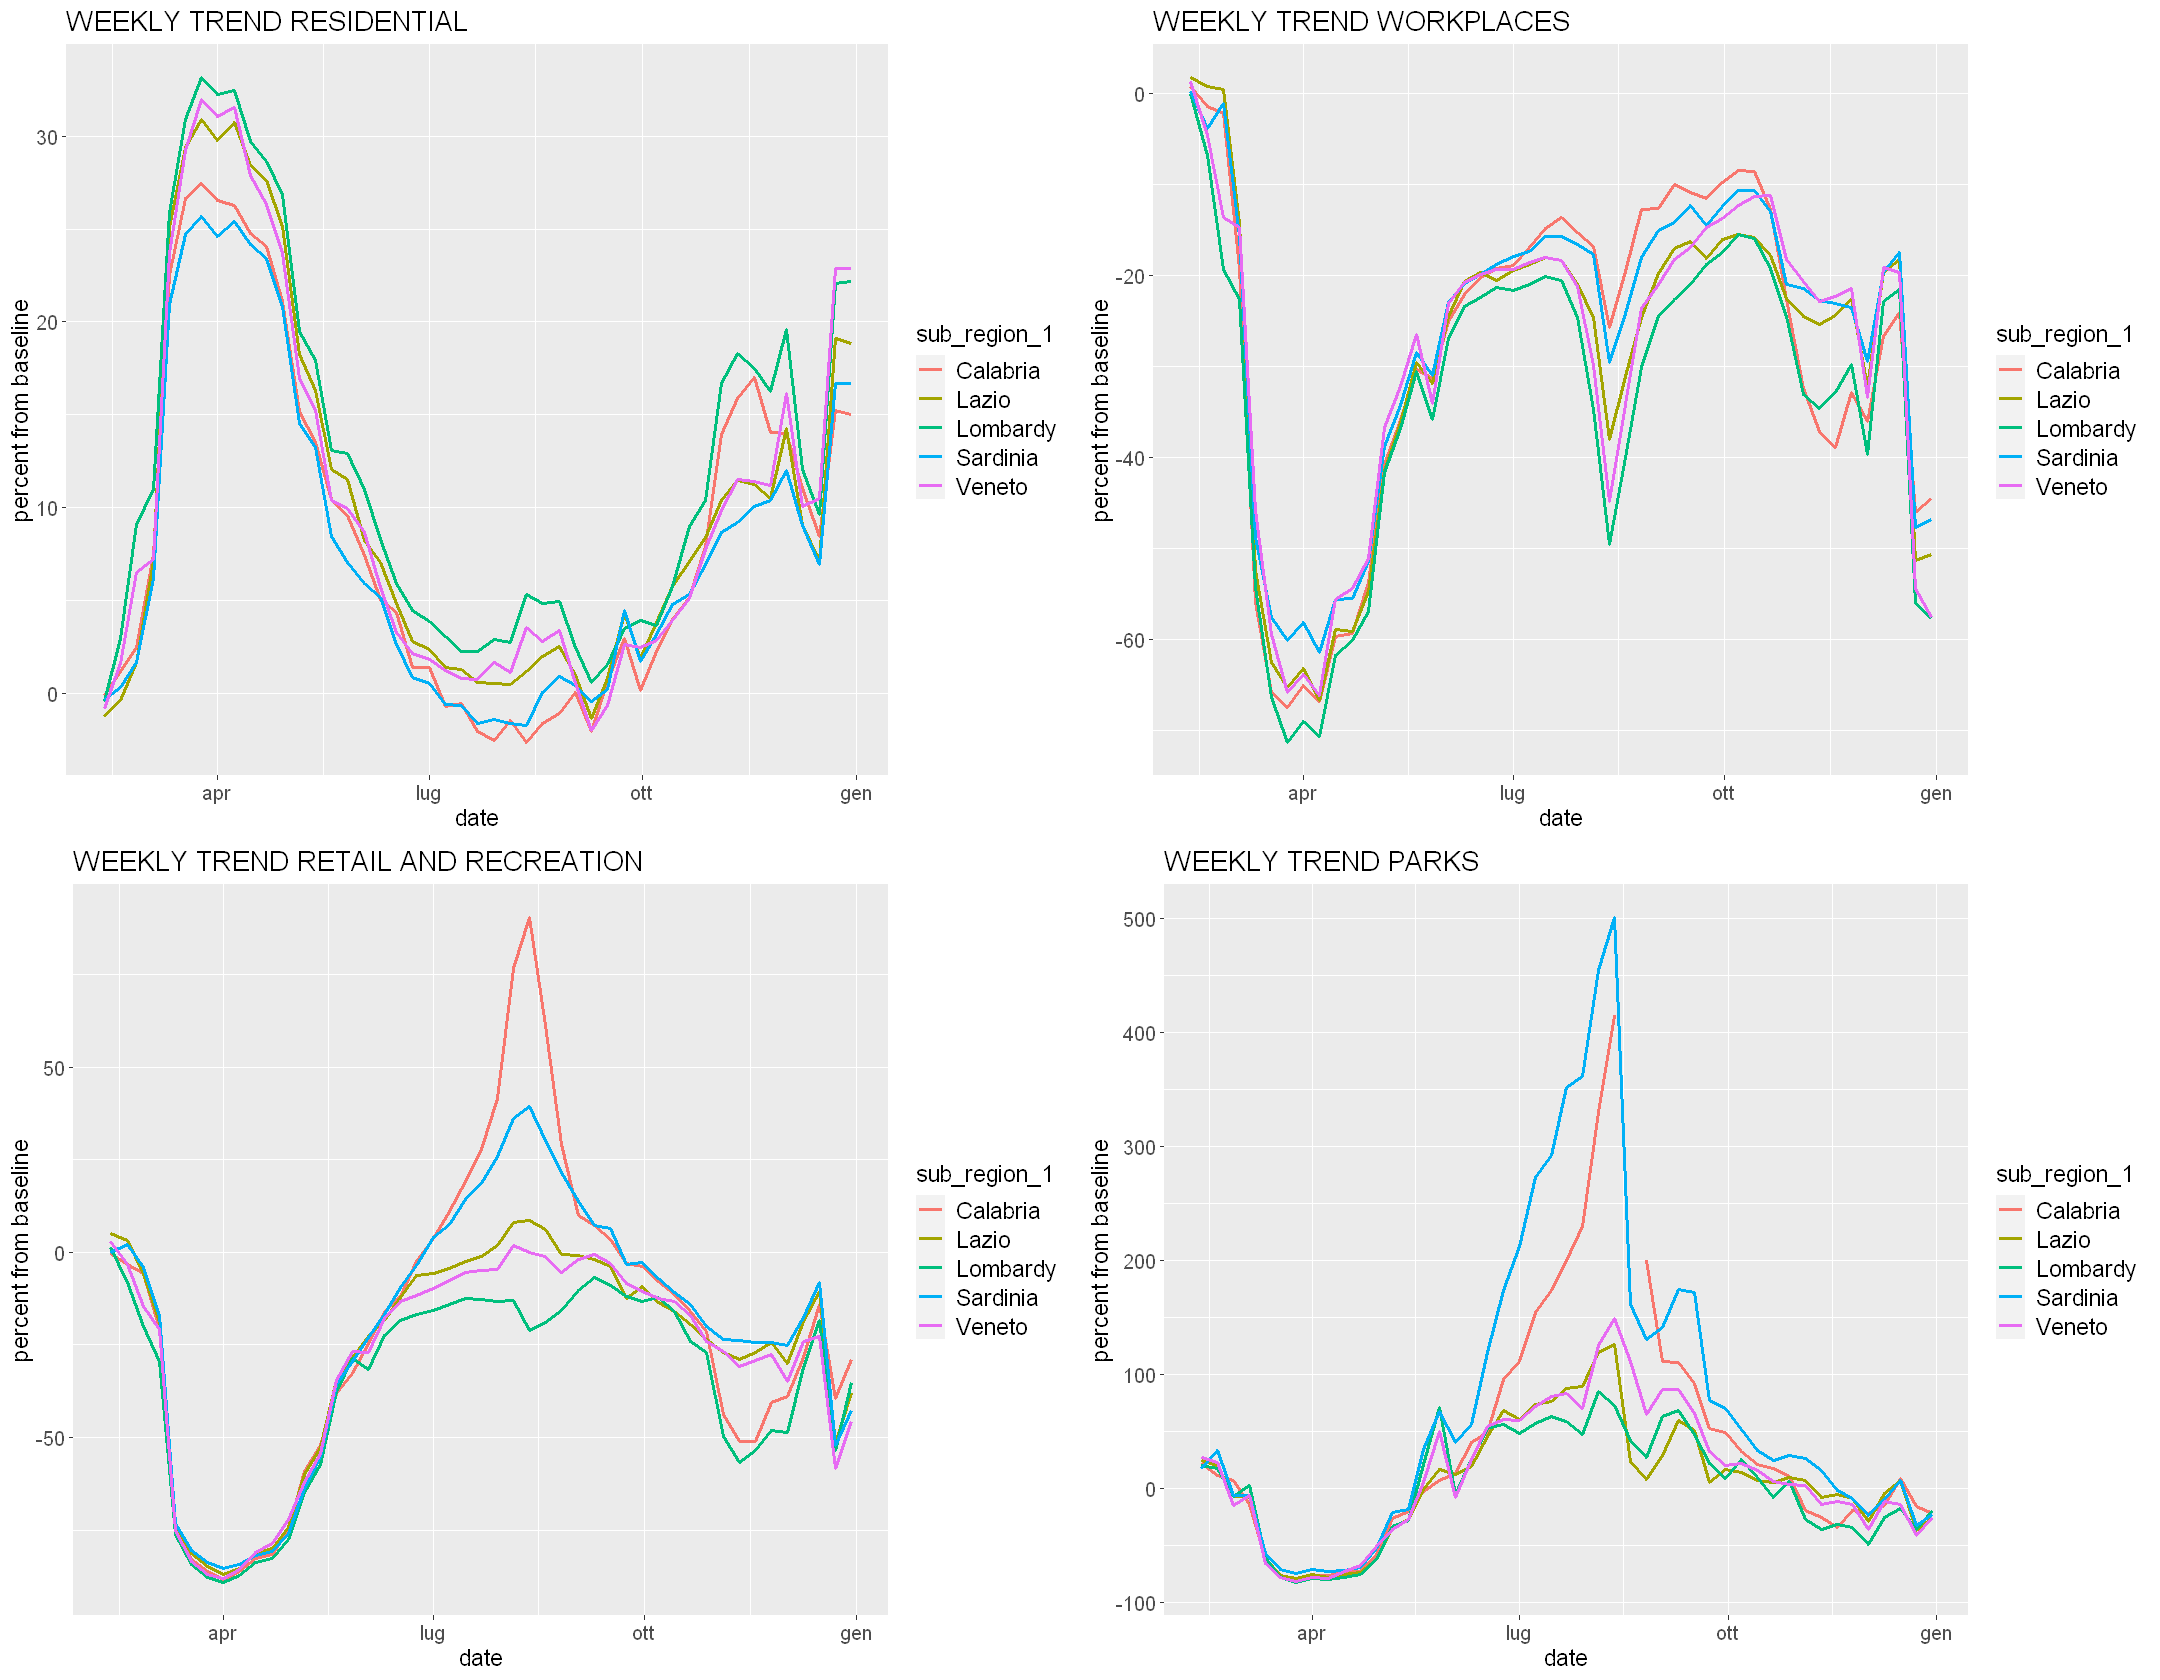

In [20]:
titles <- c('WEEKLY TREND RESIDENTIAL', 'WEEKLY TREND WORKPLACES', 'WEEKLY TREND RETAIL AND RECREATION', 'WEEKLY TREND PARKS')
ys <- list(weekly.data$residential_percent_change_from_baseline, weekly.data$workplaces_percent_change_from_baseline, 
           weekly.data$retail_and_recreation_percent_change_from_baseline, weekly.data$parks_percent_change_from_baseline)

plotfunc <- function(i){
    p1 <- weekly.data %>% ggplot(aes(date, ys[[i]], grop = sub_region_1))
    p1 + geom_line(aes(col = sub_region_1), size = 1) +
    xlab('date') + ylab('percent from baseline') + ggtitle(titles[i]) +
    theme(axis.title.x = element_text(size=14)) + theme(axis.text.x = element_text(size=12)) +
    theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12)) +
    theme(plot.title = element_text(size = 16)) +
    theme(legend.title = element_text(size = 14), legend.text = element_text(size = 14))
}

fig(18, 14)
p <- 1:4 %>% map(plotfunc)
do.call(grid.arrange, p)

From workplaces and residential data it can be seen that Italian Regions follow a similar trend, due to the national rules that for the most of 2020 were common to all regions. From data of 'tourist' places comes out a clear difference for what concern Sardinia and Calabria. These two regions have a high summer tourism and they were less affected by covid.